<a href="https://colab.research.google.com/github/PMLS-2026/week-5-cooperrathbun/blob/main/midterm_project_brian_mcclelland_cooper_rathbun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm project 5.6
Flow Cytometry
Brian McClelland & Cooper Rathbun

# Step 1: Load the Data Set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Each time that we would load into the code, we needed to reload our data set into the code. This created initial difficulties, as it would cause us errors early.

Our dataset is containing single-flow cytometry data. There are thousands of individual cells, and every row represents one cell. Observed is the phosphorlation of MEK and ERK.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 20140920-OT1-dynamics_Specimen_005_E5_E0.txt to 20140920-OT1-dynamics_Specimen_005_E5_E0.txt


Prior to this project, I did not understand the significance of "import pandas as pd." I have learned that this is neccessary in order to utilize the previously mentioned data set.

In [ ]:
import pandas as pd

file_name = '20140920-OT1-dynamics_Specimen_005_E5_E0.txt'
df = pd.read_csv(file_name, sep='\t')

# Step 2: Plot a Histogram

We have 9180 cells in our data set.

We are analyzing single cell data due to the level of heterogenicity. The are very little identical cells.



In [ ]:
# Assign the fluorescence intensity data from the DataFrame to 'x'
x = df['<FITC-A>: pMEK (S221)'].values

# Keep only positive values (fluorescence cannot be 0 or negative)
x = x[x > 0]

# Check the number of data points
print("Number of cells:", len(x))

# Look at the first 10 values
print("First 10 fluorescence values:", x[:10])

# Compute the median (Problem 5.1)
median_x = np.median(x)
print("Median fluorescence (linear scale):", median_x)

Number of cells: 9180
First 10 fluorescence values: [15848.666   11675.79     9529.58008  5561.49023  2804.47266  1151.43848
  1174.12378  2790.01147  9538.13672  8769.81738]
Median fluorescence (linear scale): 6250.134275


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = df['<FITC-A>: pMEK (S221)'].values

In [ ]:
x_pos = x[x > 0]



# Step 3: Compute Median By Way of Histogram

We interpreted our dataset by utilizing 2 varying graphs. The first was by use of a linear scale, and the second by use of a log10 scale

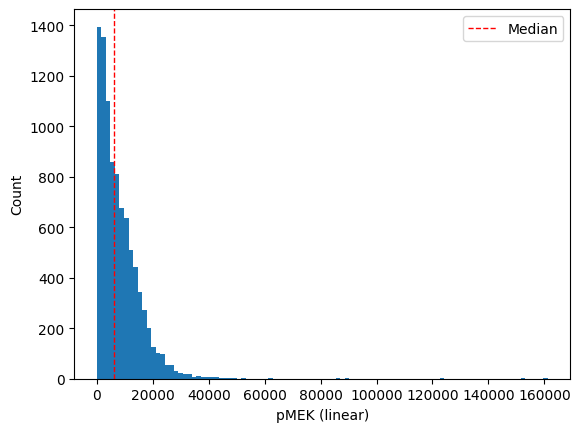

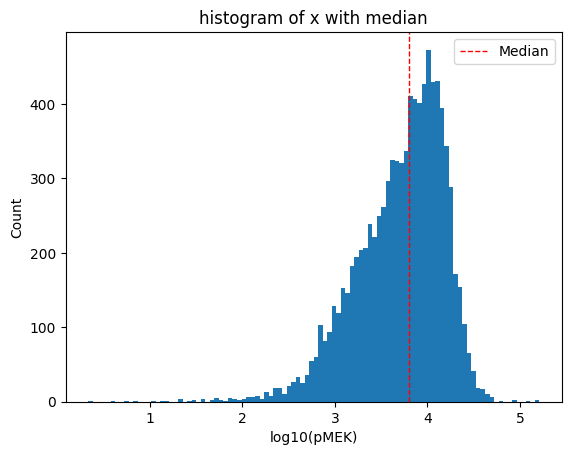

In [ ]:
plt.figure()
plt.hist(x_pos, bins=100)
plt.xlabel("pMEK (linear)")
plt.ylabel("Count")
plt.axvline(median_x, color='red', linestyle='--', linewidth=1, label='Median')
plt.legend()
plt.show()

plt.figure()
plt.hist(np.log10(x_pos), bins=100)
plt.xlabel("log10(pMEK)")
plt.ylabel("Count")
plt.axvline(np.log10(median_x), color='red', linestyle='--', linewidth=1, label='Median')
plt.legend()
plt.title("histogram of x with median")
plt.show()

The linear plot has a significant left skew.

For the log plot, we observe more similar to the bell curves that we have learned about in class. Due to the log scaling, less skew is exhibited and we are able to see more of a true population analysis.

On the linear part, the median line lies towards the left side. On the log part, the median line lies towards the center of the distribution. The median line stays the same regardless of the graph, but it is oriented differently in conjunction with the single cells depending on a log vs. a linear representation.

# Step 4: Mark the maxima

In [ ]:
counts_x, edges_x = np.histogram(x_pos, bins=100)

In order to identify local maxima in the counts_x array, each element is compared with its immediate neighbors. This is later implemented in a code block

In [ ]:
maxima_indices = []
for i in range(1, len(counts_x) - 1):
  if counts_x[i] > counts_x[i-1] and counts_x[i] > counts_x[i+1]:
    maxima_indices.append(i)

  print("Indices of local maxima in counts_x:", maxima_indices)

Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: []
Indices of local maxima in counts_x: [20]
Indices of local maxima in counts_x: [20]
Indices of local maxima in counts_x: [20, 22]
Indices of local maxima in counts_x: [20, 22]
Indices of local maxima in counts_x: [20, 22, 24]
Indices of loc

This is successful in identifying the maxima by determining the highest amount of observations. As the indices of the local maxima in counts_x have been identified, the next step is to determine their corresponding fluorescence values using the edges_x array. The edges_x array provides the bin edges, and for a given bin index i, the corresponding florescence value can be approximated by edges_x[i] or the midpoint of the bin (edges_x[i] and edges_x[i+1]). Given the problem context, edges_x[i] is a reasonable approximation for the value at the peak.







In [ ]:
maxima_fluorescence_values = [edges_x[i] for i in maxima_indices]
print("Number of identified maxima:", len(maxima_fluorescence_values))
print("Exact fluoresence values of maxima:", maxima_fluorescence_values)

Number of identified maxima: 12
Exact fluoresence values of maxima: [np.float64(32252.547650783996), np.float64(35477.5867095144), np.float64(38702.6257682448), np.float64(41927.6648269752), np.float64(45152.703885705596), np.float64(48377.742944435995), np.float64(51602.782003166394), np.float64(61277.89917935759), np.float64(85465.69211983558), np.float64(88690.73117856598), np.float64(122553.64129523518), np.float64(151578.99282380877)]


Below is a histogram representing the fluorescent values with overlaying verticles lines at the maxima_fluorescence_values. This will complete the task of 'visualize these maxima on a new histogram plot'.

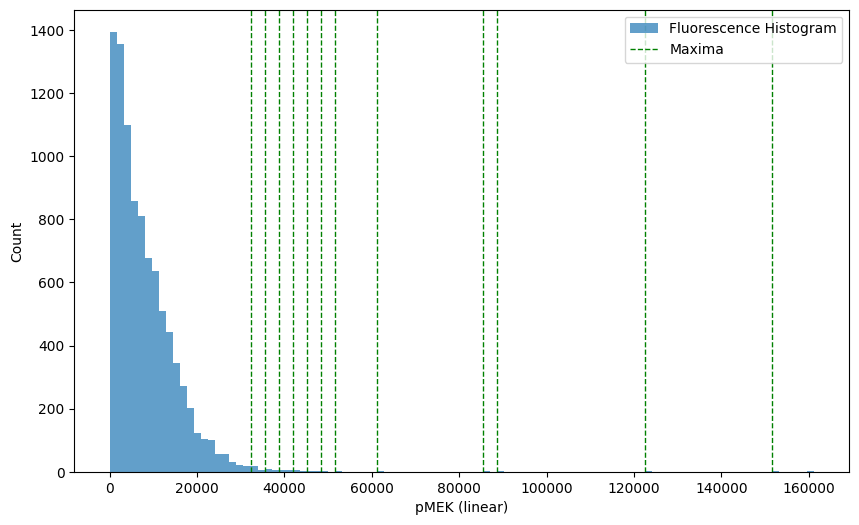

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(x_pos, bins=100, alpha=0.7, label='Fluorescence Histogram')
for mv in maxima_fluorescence_values:
  plt.axvline(mv, color='green', linestyle='--', linewidth=1, label='Maxima' if mv == maxima_fluorescence_values[0] else"")
plt.xlabel("pMEK (linear)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Step 5

Summarize the findings regarding the number and locations of the histogram maxima

# Summary

## Final Task

### Subtask:
Present a clear summary of the number and locations of the histogram maxima, addressing the user's specific questions.


## Summary:

### Q&A
*   **What is the total number of maxima?**
    The algorithm identified 12 maxima.
*   **What are their exact fluorescence values?**
    The exact fluorescence values are: \[32252.55, 35477.59, 38702.63, 41927.66, 45152.70, 48377.74, 51602.78, 61277.90, 85465.69, 88690.73, 122553.64, 151578.99].
*   **Is there a primary maximum and several secondary maxima based on the provided list of specific values?**
    The algorithmically identified maxima do not include the visually prominent primary maximum, which was observed at a much lower fluorescence intensity. Instead, the 12 identified values are considered secondary maxima, representing smaller peaks within the right-skewed tail region of the distribution.

### Data Analysis Key Findings
*   A total of 12 distinct fluorescence maxima were identified by the algorithm.
*   These maxima range from approximately 32,252 to 151,579 fluorescence units.
*   The algorithm failed to capture the visually dominant primary maximum observed at much lower fluorescence intensities on the histogram.
*   The 12 detected maxima are interpreted as secondary maxima, indicating distinct, smaller subpopulations of cells with higher pMEK fluorescence.

### Insights or Next Steps
*   The current algorithm's criteria for local maxima detection (e.g., comparison with immediate neighbors and filtering `x > 0`) may not be suitable for identifying primary maxima located at the very low end of the fluorescence spectrum or when the primary peak is a plateau rather than a sharp peak.
*   Further investigation is needed to refine the maxima detection algorithm to accurately capture both primary and secondary maxima, potentially by adjusting binning parameters or modifying the local maxima identification logic, especially for peaks near the distribution's start.
